<a href="https://colab.research.google.com/github/Shivani8780/Email-Classifier/blob/master/Matrimonial-Profile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
path = "train.csv"
df1 = pd.read_csv(path)
print(df1.head())

   Unnamed: 0  member_id gender   age   height           income  \
0          76      27908   Male  31.0  5ft 7in  Rs. 7 - 10 Lakh   
1        1916      29749   Male  33.0  5ft 5in   Rs. 0 - 1 Lakh   
2        1414      29247   Male  33.0  5ft 3in   Rs. 1 - 2 Lakh   
3         780      28612   Male  32.0  5ft 5in   Rs. 0 - 1 Lakh   
4        1919      29752   Male  31.0  5ft 7in   Rs. 3 - 4 Lakh   

  marital_status on_behalf present_city   present_state  ...  \
0  Never Married      Self     Islampur     West Bengal  ...   
1  Never Married      Self        Bihar           Bihar  ...   
2  Never Married      Self    Bhavnagar         Gujarat  ...   
3     Separated       Self          NaN             NaN  ...   
4  Never Married      Self        Sagar  Madhya Pradesh  ...   

                 employed disability mother_tongue           caste   sect  \
0  Government/Public Sect         No          Urdu        No Caste  Sunni   
1  Business/Self Employed         No          Urdu  Ahmad 

In [3]:
print(df1.isnull().sum())

Unnamed: 0             0
member_id              0
gender                 0
age                  180
height               178
income               191
marital_status       176
on_behalf              9
present_city         372
present_state        366
present_country      366
permanent_city       384
permanent_state      378
permanent_country    366
highest_education    366
occupation           520
employed             366
disability             0
mother_tongue        178
caste                180
sect                 178
family_type          451
family_status        981
gallery                0
id_proof               0
status                 0
dtype: int64


In [4]:
print(df1.nunique())

Unnamed: 0           1699
member_id            1699
gender                  2
age                    43
height                 23
income                 16
marital_status          4
on_behalf               6
present_city          341
present_state          71
present_country        37
permanent_city        344
permanent_state        69
permanent_country      35
highest_education      51
occupation             47
employed                6
disability              1
mother_tongue          25
caste                  45
sect                    2
family_type             2
family_status           3
gallery                 2
id_proof                2
status                  3
dtype: int64


In [5]:
nunique_train = df1.nunique().reset_index()
removal_col = nunique_train[(nunique_train[0]==len(df1))| (nunique_train[0]==0) | (nunique_train[0] == 1)]["index"].tolist()
print(removal_col[:5])

['Unnamed: 0', 'member_id', 'disability']


In [6]:
df1 = df1.drop(removal_col, axis=1)
print(df1.head())

  gender   age   height           income marital_status on_behalf  \
0   Male  31.0  5ft 7in  Rs. 7 - 10 Lakh  Never Married      Self   
1   Male  33.0  5ft 5in   Rs. 0 - 1 Lakh  Never Married      Self   
2   Male  33.0  5ft 3in   Rs. 1 - 2 Lakh  Never Married      Self   
3   Male  32.0  5ft 5in   Rs. 0 - 1 Lakh     Separated       Self   
4   Male  31.0  5ft 7in   Rs. 3 - 4 Lakh  Never Married      Self   

  present_city   present_state present_country permanent_city  ... occupation  \
0     Islampur     West Bengal           India       Islampur  ...    Teacher   
1        Bihar           Bihar           India          Bihar  ...     Others   
2    Bhavnagar         Gujarat           India      Bhavnagar  ...     Others   
3          NaN             NaN             NaN            NaN  ...        NaN   
4        Sagar  Madhya Pradesh           India         Jhansi  ...     Others   

                 employed mother_tongue           caste   sect  \
0  Government/Public Sect       

In [7]:
path2 = "test.csv"
df2 = pd.read_csv(path2)
df2 = df2.drop(removal_col,axis=1)
print(df2.head())

   gender   age   height            income marital_status on_behalf  \
0  Female  25.0  5ft 2in  Rs. 12 - 15 Lakh  Never Married    Sister   
1  Female  32.0  5ft 1in    Rs. 3 - 4 Lakh  Never Married    Sister   
2  Female  31.0  5ft 4in  Rs. 10 - 12 Lakh  Never Married  Daughter   
3  Female  23.0  4ft 7in    Rs. 0 - 1 Lakh  Never Married    Sister   
4  Female  26.0  4ft 8in         No Income  Never Married  Daughter   

       present_city   present_state  present_country    permanent_city  ...  \
0            Bokaro       Jharkhand            India            Bokaro  ...   
1             Noida   Uttar Pradesh            India             Noida  ...   
2       SchipolRijk       Amsterdam  Netherlands The          Bareilly  ...   
3  Sant Kabir Nagar   Uttar Pradesh            India  Sant Kabir Nagar  ...   
4           Addanki  Andhra Pradesh            India           Addanki  ...   

  highest_education occupation        employed mother_tongue     caste   sect  \
0             B.A

In [8]:
print(round(df1.status.value_counts()*100/len(df1),2))

status
0    43.85
2    28.25
1    27.90
Name: count, dtype: float64


In [9]:
df1.status = df1.status.replace({0:"approved", 1:"deleted", 2: "pending"})
print(round(df1.status.value_counts()*100/len(df1),2))

status
approved    43.85
pending     28.25
deleted     27.90
Name: count, dtype: float64


In [10]:
null = df1[df1.isnull().any(axis=1)]

In [11]:
round(null.status.value_counts()*100/len(null),2)

,count
status,
pending,40.9
deleted,29.6
approved,29.5


In [12]:
round(df1.isnull().sum()*100/len(df1),2).sort_values(ascending=False)

,0
family_status,57.74
occupation,30.61
family_type,26.55
permanent_city,22.60
permanent_state,22.25
present_city,21.90
present_state,21.54
present_country,21.54
highest_education,21.54
employed,21.54


In [13]:
df1 = df1.drop(["family_status"], axis=1)
df1.head()

,gender,age,height,income,marital_status,on_behalf,present_city,present_state,present_country,permanent_city,...,highest_education,occupation,employed,mother_tongue,caste,sect,family_type,gallery,id_proof,status
0,Male,31.0,5ft 7in,Rs. 7 - 10 Lakh,Never Married,Self,Islampur,West Bengal,India,Islampur,...,B.A.,Teacher,Government/Public Sect,Urdu,No Caste,Sunni,Joint Family,No,No,approved
1,Male,33.0,5ft 5in,Rs. 0 - 1 Lakh,Never Married,Self,Bihar,Bihar,India,Bihar,...,Others,Others,Business/Self Employed,Urdu,Ahmad or Ahmed,Sunni,NaN,No,No,pending
2,Male,33.0,5ft 3in,Rs. 1 - 2 Lakh,Never Married,Self,Bhavnagar,Gujarat,India,Bhavnagar,...,Intermediate (12th),Others,Private Sector,Hindi,Gujrati,Sunni,Joint Family,Yes,No,approved
3,Male,32.0,5ft 5in,Rs. 0 - 1 Lakh,Separated,Self,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Hindi,No Caste,Sunni,NaN,No,No,pending
4,Male,31.0,5ft 7in,Rs. 3 - 4 Lakh,Never Married,Self,Sagar,Madhya Pradesh,India,Jhansi,...,B.Sc. - Bachelor of Sc,Others,Government/Public Sect,Hindi,Others,Sunni,Nuclear Family,Yes,No,approved


In [14]:
df2 = df2.drop(["family_status"], axis=1)
df2.head()

,gender,age,height,income,marital_status,on_behalf,present_city,present_state,present_country,permanent_city,...,permanent_country,highest_education,occupation,employed,mother_tongue,caste,sect,family_type,gallery,id_proof
0,Female,25.0,5ft 2in,Rs. 12 - 15 Lakh,Never Married,Sister,Bokaro,Jharkhand,India,Bokaro,...,India,B.A.,NaN,Not Working,Urdu,Ansari,Sunni,Nuclear Family,No,No
1,Female,32.0,5ft 1in,Rs. 3 - 4 Lakh,Never Married,Sister,Noida,Uttar Pradesh,India,Noida,...,India,B.A.,Librarian,Not Working,Hindi,Syed,Sunni,Nuclear Family,No,No
2,Female,31.0,5ft 4in,Rs. 10 - 12 Lakh,Never Married,Daughter,SchipolRijk,Amsterdam,Netherlands The,Bareilly,...,India,M.Tech / M.E,Others,Private Sector,Urdu,Siddique,Sunni,Nuclear Family,No,No
3,Female,23.0,4ft 7in,Rs. 0 - 1 Lakh,Never Married,Sister,Sant Kabir Nagar,Uttar Pradesh,India,Sant Kabir Nagar,...,India,Others,Others,Not Working,Hindi,Malik,Sunni,Joint Family,No,No
4,Female,26.0,4ft 8in,No Income,Never Married,Daughter,Addanki,Andhra Pradesh,India,Addanki,...,India,B.Arch,Writer,Private Sector,Urdu,Quraishi,Sunni,Nuclear Family,No,No


In [15]:
cat_col = df1.select_dtypes(include="object").columns.tolist()
print(cat_col)

['gender', 'height', 'income', 'marital_status', 'on_behalf', 'present_city', 'present_state', 'present_country', 'permanent_city', 'permanent_state', 'permanent_country', 'highest_education', 'occupation', 'employed', 'mother_tongue', 'caste', 'sect', 'family_type', 'gallery', 'id_proof', 'status']


In [16]:
round(df1[cat_col].isnull().sum()*100/len(df1),2).sort_values(ascending=False)

,0
occupation,30.61
family_type,26.55
permanent_city,22.60
permanent_state,22.25
present_city,21.90
present_state,21.54
present_country,21.54
highest_education,21.54
employed,21.54
permanent_country,21.54


In [17]:
df1[cat_col] = df1[cat_col].fillna("Unknown")
round(df1.isnull().sum( )*100/len(df1),2).sort_values(ascending=False)

,0
age,10.59
gender,0.00
id_proof,0.00
gallery,0.00
family_type,0.00
sect,0.00
caste,0.00
mother_tongue,0.00
employed,0.00
occupation,0.00


In [18]:
cat_col.remove("status")

In [19]:
df2[cat_col] = df2[cat_col].fillna("Unknown")
round(df2.isnull().sum( )*100/len(df2),2).sort_values(ascending=False)

,0
age,11.96
gender,0.00
permanent_country,0.00
gallery,0.00
family_type,0.00
sect,0.00
caste,0.00
mother_tongue,0.00
employed,0.00
occupation,0.00


In [20]:
df1[cat_col].nunique().sort_values(ascending=False)

,0
permanent_city,345
present_city,342
present_state,72
permanent_state,70
highest_education,52
occupation,48
caste,46
present_country,38
permanent_country,36
mother_tongue,26


In [21]:
df2[cat_col].nunique().sort_values(ascending=False)

,0
present_city,114
permanent_city,110
occupation,42
highest_education,36
caste,36
present_state,34
permanent_state,30
height,23
mother_tongue,17
income,16


In [22]:
df1["occupation"].unique()

array(['Teacher', 'Others', 'Unknown', 'Advertising Profession',
       'Hotels/Hospitality Pro', 'Chartered Accountant',
       'Film/ Entertainment Pr', 'Fashion Designer', 'Doctor',
       'Businessperson', 'Media Professional', 'Education Professional',
       'Scientist', 'Agent', 'Interior Designer',
       'Educational Institutio', 'Business Owner/ Entrep',
       'Lawyer &amp; Legal Pro', 'Agriculture Profession',
       'Medical/ Healthcare Pr', 'Professor/Lecturer',
       'Subject Matter Expert', 'Pharmacist', 'Sportsperson',
       'Science Professional', 'Travel Professional',
       'Research Professional', 'Farming', 'Singer', 'Research Assistant',
       'Physiotherapist', 'Nurse', 'Dentist', 'Actor/Model',
       'VP/ AVP/ GM/ DGM', 'Artist', 'Social Services/ NGO/ ',
       'Consultant', 'Writer', 'Student', 'Beautician', 'Architect',
       'CxO/ Chairman/ Preside', 'Fitness Professional', 'Broker',
       'Non – IT Engineer', 'Psychologist', 'Librarian'], dtype=obje

In [23]:
df1["highest_education"].unique()

array(['B.A. ', 'Others', 'Intermediate (12th)', 'Unknown',
       'B.Sc. - Bachelor of Sc', 'B.Sc.', 'B.Tech / B.E.', 'B.Com.',
       'B.B.A.', 'M.B.B.S.', 'Bachelor of Law - L.L.', 'B.Des. / B.D.',
       'M.Sc.', 'B.Arch', 'M.C.A.', 'Doctor of Philosophy -',
       'Master of Arts - M.A.', 'Master of Education - ', 'B.Ed',
       'B.Pharm / B.Pharma.', 'M.Tech / M.E', 'Bachelor of Library Sc',
       'B.C.A.', 'M.B.A.', 'M.Pharm ', 'B.U.M.S', 'M.Sc. (Agriculture)',
       'M.Com.', 'M.M.C / M.M.M / M.J.M.', 'Master of Library Scie',
       'Doctorate of Medicine ', 'M.Phil. ', 'M.Des./ M.Design.', 'B.IT',
       'M.P.T.', 'B.P.T.', 'Master of Social Work ',
       'Master of Fine Arts - ', 'Bachelor of Fine Arts ',
       'B.M.C. / B.M.M./ B.J.M', 'Doctor of Medicine - M',
       'Doctor of Pharmacy - P', 'B.A.M.S.', 'Bachelor of Nursing ',
       'Bachelor of Physical E', 'Bachelor of Social Wor',
       'Master of Surgery - M.', 'B.D.S.', 'M.D.S.', 'M.V.Sc.', 'L.L.M.',
       'B.

In [24]:
df1['highest_education'] = df1['highest_education'].replace({'B.A. ':'Bachelor',
       'B.Sc. - Bachelor of Sc':'Bachelor', 'B.Sc.':'Bachelor', 'B.Tech / B.E.':'Bachelor', 'B.Com.':'Bachelor',
       'B.B.A.':'Bachelor', 'M.B.B.S.':'Bachelor', 'Bachelor of Law - L.L.':'Bachelor', 'B.Des. / B.D.':'Bachelor',
       'M.Sc.':'Master', 'B.Arch':'Bachelor', 'M.C.A.':'Master', 'Doctor of Philosophy -':'Doctor',
       'Master of Arts - M.A.':'Master', 'Master of Education - ':'Master', 'B.Ed':'Bachelor',
       'B.Pharm / B.Pharma.':'Bachelor', 'M.Tech / M.E':'Master', 'Bachelor of Library Sc':'Bachelor',
       'B.C.A.':'Bachelor', 'M.B.A.':'Master', 'M.Pharm ':'Master', 'B.U.M.S':'Bachelor', 'M.Sc. (Agriculture)':'Master',
       'M.Com.':'Master', 'M.M.C / M.M.M / M.J.M.':'Master', 'Master of Library Scie':'Master',
       'Doctorate of Medicine ':'Doctor', 'M.Phil. ':'Master', 'M.Des./ M.Design.':'Master', 'B.IT':'Bachelor',
       'M.P.T.':'Master', 'B.P.T.':'Bachelor', 'Master of Social Work ':'Master',
       'Master of Fine Arts - ':'Master', 'Bachelor of Fine Arts ':'Bachelor',
       'B.M.C. / B.M.M./ B.J.M':'Bachelor', 'Doctor of Medicine - M':'Doctor',
       'Doctor of Pharmacy - P':'Doctor', 'B.A.M.S.':'Bachelor', 'Bachelor of Nursing ':'Bachelor',
       'Bachelor of Physical E':'Bachelor', 'Bachelor of Social Wor':'Bachelor',
       'Master of Surgery - M.':'Master', 'B.D.S.':'Bachelor', 'M.D.S.':'Master', 'M.V.Sc.':'Master',
       'L.L.M.':'Master','B.H.M.S':'Bachelor'})
df1["highest_education"].value_counts()

,count
highest_education,
Bachelor,720
Unknown,366
Others,298
Master,257
Intermediate (12th),38
Doctor,20


In [25]:
df1.permanent_city.unique()

array(['Islampur', 'Bihar', 'Bhavnagar', 'Unknown', 'Jhansi', 'Amroha',
       'Ranchi', 'Hyderabad', 'Patna', 'Coimbatore', 'Dhanbad', 'Kanpur',
       'New Delhi', 'Ghaziabad', 'Allahabad', 'Agra', 'Hooghly',
       'Balrampur', 'Chandigarh', 'Bilaspur-Chhattisgarh', 'Balti',
       'Muzaffarpur', 'Varanasi', 'Darbhanga', 'Sheoganj', 'Gorakhpur',
       'Tirunelveli', 'Kolkata', 'Lucknow', 'Gangtok', 'Secunderabad',
       'Sultanpur', 'Mumbai', 'Barabanki', 'Pune', 'Gurugram (Gurgaon)',
       'Deoband', 'Samastipur', 'Aligarh', 'Arrah', 'Baramati', 'Meerut',
       'Araria', 'Murshidabad', 'Jamshedpur', 'Comrat', 'Orai', 'Afono',
       'Jamui', 'Tehran', 'Sitapur', 'Chimbel', 'Bareilly', 'Adilabad',
       'Muzaffarnagar', 'Katihar', 'Adoni', 'Illoqqortoormiut', 'Delhi',
       'Makkah', 'Cairo', 'Bandipur', 'Jaipur', 'Raichur', 'Dubai',
       'Gaya', 'Begusarai', 'Kannauj', 'Rohtas', 'Dehradun', 'Hardoi',
       'Bulandshahar', 'Akividu', 'Jaunpur', 'Kishangarh', 'Fatehpur',
   

In [26]:
df1["present_city"].unique()

array(['Islampur', 'Bihar', 'Bhavnagar', 'Unknown', 'Sagar', 'Amroha',
       'Ranchi', 'Hyderabad', 'New Delhi', 'Coimbatore', 'Dhanbad',
       'Kanpur', 'Ghaziabad', 'Rae Bareilly', 'Agra', 'Hooghly',
       'Balrampur', 'Chandigarh', 'Mahabubnagar', 'Bilaspur-Chhattisgarh',
       'Lahore', 'Muzaffarpur', 'Varanasi', 'Patna', 'Darbhanga',
       'Sheoganj', 'Gorakhpur', 'Tirunelveli', 'Kolkata', 'Lucknow',
       'Gangtok', 'Secunderabad', 'Sultanpur', 'Mumbai', 'Barabanki',
       'Pune', 'Gurugram (Gurgaon)', 'Deoband', 'Samastipur', 'Aligarh',
       'Arrah', 'Baramati', 'Meerut', 'Araria', 'Murshidabad', 'Siwan',
       'Allahabad', 'Jamshedpur', 'Marcory', 'Orai', 'Afono',
       'Aurangabad-Maharashtra', 'Tehran', 'Sitapur', 'Abha', 'Bareilly',
       'Muzaffarnagar', 'Katihar', 'Adoni', 'Delhi', 'Makkah', 'Cairo',
       'Bandipur', 'Jaipur', 'Raichur', 'Dubai', 'Gaya', 'Begusarai',
       'Kannauj', 'Rohtas', 'Hardoi', 'Bulandshahar', 'Goa', 'Jaunpur',
       'Kishangarh', 

In [27]:
import numpy as np
df1['City_Same'] = np.where( (df1['permanent_city']==df1['present_city'] ) , 1, 0)
df1['City_Same'].value_counts()

,count
City_Same,
1,1580
0,119


In [28]:
df2['City_Same'] = np.where( (df2['permanent_city']==df2['present_city'] ) , 1, 0)
df2["City_Same"].value_counts()

,count
City_Same,
1,285
0,16


In [29]:
df1["State_Same"] = np.where((df1["permanent_state"] == df1["present_state"] ), 1, 0)
df1["State_Same"].value_counts()

,count
State_Same,
1,1610
0,89


In [30]:
df2["State_Same"] = np.where((df2["permanent_state"] == df2["present_state"] ), 1, 0)
df2["State_Same"].value_counts()

,count
State_Same,
1,288
0,13


In [31]:
df1["Country_Same"] = np.where((df1["permanent_country"] == df1["present_country"] ), 1, 0)
df1["Country_Same"].value_counts()

,count
Country_Same,
1,1678
0,21


In [32]:
df2["Country_Same"] = np.where((df2["permanent_country"] == df2["present_country"] ), 1, 0)
df2["Country_Same"].value_counts()

,count
Country_Same,
1,296
0,5


In [33]:
df1['permanent_country'].value_counts()

,count
permanent_country,
India,1270
Unknown,366
Pakistan,17
United Arab Emirates,5
Saudi Arabia,4
Afghanistan,2
Bangladesh,2
United Kingdom,2
Indonesia,2


In [34]:
df1["present_country"].value_counts()

,count
present_country,
India,1258
Unknown,366
Pakistan,16
United Arab Emirates,9
Saudi Arabia,8
Canada,3
Indonesia,2
Russia,2
Afghanistan,2


In [35]:
df2["permanent_country"].value_counts()

,count
permanent_country,
India,220
Unknown,73
United Kingdom,2
Saudi Arabia,1
Sri Lanka,1
Nigeria,1
United Arab Emirates,1
Tanzania,1
Sudan,1


In [36]:
df2["present_country"].value_counts()

,count
present_country,
India,216
Unknown,73
United Kingdom,3
Saudi Arabia,2
United Arab Emirates,2
Netherlands The,1
Ireland,1
Nigeria,1
Tanzania,1


In [37]:
df1["sect"].value_counts()

,count
sect,
Sunni,1370
Unknown,178
Shia,151


In [38]:
df1["Muslim Profile"] = np.where((df1["sect"]!="Unknown"),1,0)

In [39]:
df1["Muslim Profile"].value_counts()

,count
Muslim Profile,
1,1521
0,178


In [40]:
df2["Muslim Profile"] = np.where((df2["sect"]!="Unknown"),1,0)
df2['Muslim Profile'].value_counts()

,count
Muslim Profile,
1,264
0,37


In [41]:
df1['Foreign Citizen'] = np.where( (df1['permanent_country']!='India' ) , 1, 0)
df1['Foreign Citizen'].value_counts()

,count
Foreign Citizen,
0,1270
1,429


In [42]:
df2["Foreign Citizen"] = np.where( (df2['permanent_country']!='India' ) , 1, 0)
df2["Foreign Citizen"].value_counts()

,count
Foreign Citizen,
0,220
1,81


In [43]:
df1['Foreign Citizen working in India'] = np.where( ((df1['permanent_country']!='India' ) &
                                                     (df1['present_country']=='India' ))
                                                     , 1, 0)
df1['Foreign Citizen working in India'].value_counts()

,count
Foreign Citizen working in India,
0,1697
1,2


In [44]:
df2["Foreign Citizen working in India"] = np.where( ((df2['permanent_country']!='India' ) &
                                                     (df2['present_country']=='India' ))
                                                     , 1, 0)
df2["Foreign Citizen working in India"].value_counts()

,count
Foreign Citizen working in India,
0,301


In [45]:
df1['Indian Citizen'] = np.where( (((df1['permanent_country']=='India') &
                                      (df1['present_country']=='India') ) ) , 1, 0)
df1['Indian Citizen'].value_counts()

,count
Indian Citizen,
1,1256
0,443


In [46]:
df2["Indian Citizen"] = np.where( (((df2['permanent_country']=='India') &
                                      (df2['present_country']=='India') ) ) , 1, 0)
df2["Indian Citizen"].value_counts()

,count
Indian Citizen,
1,216
0,85


In [47]:
df1['Is_NRI'] = np.where( (((df1['permanent_country']=='India') &
                                      (df1['present_country']!='India') ) ) , 1, 0)
df1['Is_NRI'].value_counts()

,count
Is_NRI,
0,1685
1,14


In [48]:
df2["Is_NRI"] = np.where( (((df2['permanent_country']=='India') &
                                      (df2['present_country']!='India') ) ) , 1, 0)
df2["Is_NRI"].value_counts()

,count
Is_NRI,
0,297
1,4


In [49]:
df1["caste"].value_counts()

,count
caste,
No Caste,349
Unknown,180
Khan or Pathan,179
Sheikh or Shaikh,172
Ansari,146
Syed,115
Siddique,57
Others,49
Sunni,46


In [50]:
df1["mother_tongue"].value_counts()

,count
mother_tongue,
Hindi,704
Urdu,641
Unknown,178
English,49
Malayalam,24
Tamil,23
Bengali,15
Kashmiri,15
Arabic,10


In [51]:
for feature in ['permanent_city','present_city','present_state','permanent_state',
 'caste','present_country','permanent_country','mother_tongue','occupation']:
    df1[feature] = df1[feature].mask(df1[feature].map(df1[feature].value_counts(normalize=True)) < 0.05, 'Other')
df1.nunique()

,0
gender,2
age,43
height,24
income,17
marital_status,5
on_behalf,7
present_city,4
present_state,6
present_country,3
permanent_city,4


In [52]:
for feature in ['permanent_city','present_city','present_state','permanent_state',
 'caste','present_country','permanent_country','mother_tongue','occupation']:
    df2[feature] = df2[feature].mask(df2[feature].map(df2[feature].value_counts(normalize=True)) < 0.05, 'Other')
df2.nunique()

,0
gender,2
age,33
height,23
income,16
marital_status,5
on_behalf,7
present_city,4
present_state,6
present_country,3
permanent_city,4


In [53]:
df1["permanent_city"].value_counts()

,count
permanent_city,
Other,1048
Unknown,384
Hyderabad,165
New Delhi,102


In [54]:
df1["present_city"].value_counts()

,count
present_city,
Other,1043
Unknown,372
Hyderabad,170
New Delhi,114


In [55]:
df1["present_state"].value_counts()

,count
present_state,
Other,411
Uttar Pradesh,408
Unknown,366
Telangana,208
Delhi,182
Bihar,124


In [56]:
df1["permanent_state"].value_counts()

,count
permanent_state,
Other,405
Uttar Pradesh,405
Unknown,378
Telangana,206
Delhi,165
Bihar,140


In [57]:
df1["caste"].value_counts()

,count
caste,
Other,558
No Caste,349
Unknown,180
Khan or Pathan,179
Sheikh or Shaikh,172
Ansari,146
Syed,115


In [58]:
df1["present_country"].value_counts()

,count
present_country,
India,1258
Unknown,366
Other,75


In [59]:
df1["permanent_country"].value_counts()

,count
permanent_country,
India,1270
Unknown,366
Other,63


In [60]:
df1["mother_tongue"].value_counts()

,count
mother_tongue,
Hindi,704
Urdu,641
Unknown,178
Other,176


In [61]:
df1["highest_education"].value_counts()

,count
highest_education,
Bachelor,720
Unknown,366
Others,298
Master,257
Intermediate (12th),38
Doctor,20


In [62]:
df1["occupation"].value_counts()

,count
occupation,
Others,578
Unknown,520
Other,508
Business Owner/ Entrep,93


In [63]:
df1=df1.drop(["permanent_city","present_city","present_state","permanent_state","caste","present_country","permanent_country","mother_tongue"],axis=1)
df1.head()

,gender,age,height,income,marital_status,on_behalf,highest_education,occupation,employed,sect,...,id_proof,status,City_Same,State_Same,Country_Same,Muslim Profile,Foreign Citizen,Foreign Citizen working in India,Indian Citizen,Is_NRI
0,Male,31.0,5ft 7in,Rs. 7 - 10 Lakh,Never Married,Self,Bachelor,Other,Government/Public Sect,Sunni,...,No,approved,1,1,1,1,0,0,1,0
1,Male,33.0,5ft 5in,Rs. 0 - 1 Lakh,Never Married,Self,Others,Others,Business/Self Employed,Sunni,...,No,pending,1,1,1,1,0,0,1,0
2,Male,33.0,5ft 3in,Rs. 1 - 2 Lakh,Never Married,Self,Intermediate (12th),Others,Private Sector,Sunni,...,No,approved,1,1,1,1,0,0,1,0
3,Male,32.0,5ft 5in,Rs. 0 - 1 Lakh,Separated,Self,Unknown,Unknown,Unknown,Sunni,...,No,pending,1,1,1,1,1,0,0,0
4,Male,31.0,5ft 7in,Rs. 3 - 4 Lakh,Never Married,Self,Bachelor,Others,Government/Public Sect,Sunni,...,No,approved,0,0,1,1,0,0,1,0


In [64]:
df2=df2.drop(["permanent_city","present_city","present_state","permanent_state","caste","present_country","permanent_country","mother_tongue"],axis=1)
df2.head()

,gender,age,height,income,marital_status,on_behalf,highest_education,occupation,employed,sect,...,gallery,id_proof,City_Same,State_Same,Country_Same,Muslim Profile,Foreign Citizen,Foreign Citizen working in India,Indian Citizen,Is_NRI
0,Female,25.0,5ft 2in,Rs. 12 - 15 Lakh,Never Married,Sister,B.A.,Unknown,Not Working,Sunni,...,No,No,1,1,1,1,0,0,1,0
1,Female,32.0,5ft 1in,Rs. 3 - 4 Lakh,Never Married,Sister,B.A.,Other,Not Working,Sunni,...,No,No,1,1,1,1,0,0,1,0
2,Female,31.0,5ft 4in,Rs. 10 - 12 Lakh,Never Married,Daughter,M.Tech / M.E,Others,Private Sector,Sunni,...,No,No,0,0,0,1,0,0,0,1
3,Female,23.0,4ft 7in,Rs. 0 - 1 Lakh,Never Married,Sister,Others,Others,Not Working,Sunni,...,No,No,1,1,1,1,0,0,1,0
4,Female,26.0,4ft 8in,No Income,Never Married,Daughter,B.Arch,Other,Private Sector,Sunni,...,No,No,1,1,1,1,0,0,1,0


In [65]:
df1["gender"].value_counts()

,count
gender,
Male,1188
Female,511


In [66]:
df1['gender']= df1['gender'].replace({'Male':0,'Female':1})
df1.head()

<ipython-input-66-8626bbd2de35>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender']= df1['gender'].replace({'Male':0,'Female':1})


,gender,age,height,income,marital_status,on_behalf,highest_education,occupation,employed,sect,...,id_proof,status,City_Same,State_Same,Country_Same,Muslim Profile,Foreign Citizen,Foreign Citizen working in India,Indian Citizen,Is_NRI
0,0,31.0,5ft 7in,Rs. 7 - 10 Lakh,Never Married,Self,Bachelor,Other,Government/Public Sect,Sunni,...,No,approved,1,1,1,1,0,0,1,0
1,0,33.0,5ft 5in,Rs. 0 - 1 Lakh,Never Married,Self,Others,Others,Business/Self Employed,Sunni,...,No,pending,1,1,1,1,0,0,1,0
2,0,33.0,5ft 3in,Rs. 1 - 2 Lakh,Never Married,Self,Intermediate (12th),Others,Private Sector,Sunni,...,No,approved,1,1,1,1,0,0,1,0
3,0,32.0,5ft 5in,Rs. 0 - 1 Lakh,Separated,Self,Unknown,Unknown,Unknown,Sunni,...,No,pending,1,1,1,1,1,0,0,0
4,0,31.0,5ft 7in,Rs. 3 - 4 Lakh,Never Married,Self,Bachelor,Others,Government/Public Sect,Sunni,...,No,approved,0,0,1,1,0,0,1,0


In [67]:
df2["gender"] = df2["gender"].replace({"Male":0,"Female":1})
df2.head()

<ipython-input-67-51ba04ca4bea>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2["gender"] = df2["gender"].replace({"Male":0,"Female":1})


,gender,age,height,income,marital_status,on_behalf,highest_education,occupation,employed,sect,...,gallery,id_proof,City_Same,State_Same,Country_Same,Muslim Profile,Foreign Citizen,Foreign Citizen working in India,Indian Citizen,Is_NRI
0,1,25.0,5ft 2in,Rs. 12 - 15 Lakh,Never Married,Sister,B.A.,Unknown,Not Working,Sunni,...,No,No,1,1,1,1,0,0,1,0
1,1,32.0,5ft 1in,Rs. 3 - 4 Lakh,Never Married,Sister,B.A.,Other,Not Working,Sunni,...,No,No,1,1,1,1,0,0,1,0
2,1,31.0,5ft 4in,Rs. 10 - 12 Lakh,Never Married,Daughter,M.Tech / M.E,Others,Private Sector,Sunni,...,No,No,0,0,0,1,0,0,0,1
3,1,23.0,4ft 7in,Rs. 0 - 1 Lakh,Never Married,Sister,Others,Others,Not Working,Sunni,...,No,No,1,1,1,1,0,0,1,0
4,1,26.0,4ft 8in,No Income,Never Married,Daughter,B.Arch,Other,Private Sector,Sunni,...,No,No,1,1,1,1,0,0,1,0


In [68]:
df1["height"].unique()

array(['5ft 7in', '5ft 5in', '5ft 3in', 'Unknown', '5ft 6in', '5ft 10in',
       'Below 4ft 6in', '5ft 8in', '6ft', '5ft 9in', '6ft 2in', '5ft 1in',
       '5ft 2in', '5ft 4in', '5ft', '5ft 11in', '4ft 11in', '4ft 7in',
       '6ft 1in', '4ft 10in', 'Above 6ft 2in', '4ft 8in', '4ft 9in',
       '4ft 6in'], dtype=object)

In [69]:
df2["height"].unique()

array(['5ft 2in', '5ft 1in', '5ft 4in', '4ft 7in', '4ft 8in', 'Unknown',
       '5ft 10in', '5ft 3in', '5ft', '5ft 7in', '5ft 5in', '6ft',
       '5ft 9in', '4ft 6in', '5ft 6in', '5ft 11in', '5ft 8in', '6ft 2in',
       '4ft 10in', '6ft 1in', '4ft 11in', '4ft 9in', 'Above 6ft 2in'],
      dtype=object)

In [70]:
set(df1["income"].unique().tolist())^set(df2["income"].unique().tolist())

{'Rs. 50 - 75 Lakh'}

In [71]:
df1["income"] = df1["income"].replace({'Rs. 7 - 10 Lakh':7, 'Rs. 0 - 1 Lakh':1, 'Rs. 1 - 2 Lakh':2,
       'Rs. 3 - 4 Lakh':4, 'Rs. 4 - 5 Lakh':5, 'Unknown':-1, 'Rs. 5 - 7 Lakh':6,
       'No Income':0, 'Rs. 2 - 3 Lakh':3, 'Rs. 20 - 35 Lakh':11,
       'Rs. 10 - 12 Lakh':8, 'Rs. 12 - 15 Lakh':9, 'Rs. 15 - 20 Lakh':10,
       'Rs. 75 - 100 Lakh':14, 'Rs. 1 Crore & Above':15, 'Rs. 50 - 75 Lakh':13,
       'Rs. 35 - 50 Lakh':12})
df1.head()

<ipython-input-71-a2721597f0c7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["income"] = df1["income"].replace({'Rs. 7 - 10 Lakh':7, 'Rs. 0 - 1 Lakh':1, 'Rs. 1 - 2 Lakh':2,


,gender,age,height,income,marital_status,on_behalf,highest_education,occupation,employed,sect,...,id_proof,status,City_Same,State_Same,Country_Same,Muslim Profile,Foreign Citizen,Foreign Citizen working in India,Indian Citizen,Is_NRI
0,0,31.0,5ft 7in,7,Never Married,Self,Bachelor,Other,Government/Public Sect,Sunni,...,No,approved,1,1,1,1,0,0,1,0
1,0,33.0,5ft 5in,1,Never Married,Self,Others,Others,Business/Self Employed,Sunni,...,No,pending,1,1,1,1,0,0,1,0
2,0,33.0,5ft 3in,2,Never Married,Self,Intermediate (12th),Others,Private Sector,Sunni,...,No,approved,1,1,1,1,0,0,1,0
3,0,32.0,5ft 5in,1,Separated,Self,Unknown,Unknown,Unknown,Sunni,...,No,pending,1,1,1,1,1,0,0,0
4,0,31.0,5ft 7in,4,Never Married,Self,Bachelor,Others,Government/Public Sect,Sunni,...,No,approved,0,0,1,1,0,0,1,0


In [72]:
df2['income']=df2['income'].replace({'Rs. 7 - 10 Lakh':7, 'Rs. 0 - 1 Lakh':1, 'Rs. 1 - 2 Lakh':2,
       'Rs. 3 - 4 Lakh':4, 'Rs. 4 - 5 Lakh':5, 'Unknown':-1, 'Rs. 5 - 7 Lakh':6,
       'No Income':0, 'Rs. 2 - 3 Lakh':3, 'Rs. 20 - 35 Lakh':11,
       'Rs. 10 - 12 Lakh':8, 'Rs. 12 - 15 Lakh':9, 'Rs. 15 - 20 Lakh':10,
       'Rs. 75 - 100 Lakh':14, 'Rs. 1 Crore & Above':15, 'Rs. 50 - 75 Lakh':13,
       'Rs. 35 - 50 Lakh':12})
df2.head()

<ipython-input-72-bf8260b403b2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['income']=df2['income'].replace({'Rs. 7 - 10 Lakh':7, 'Rs. 0 - 1 Lakh':1, 'Rs. 1 - 2 Lakh':2,


,gender,age,height,income,marital_status,on_behalf,highest_education,occupation,employed,sect,...,gallery,id_proof,City_Same,State_Same,Country_Same,Muslim Profile,Foreign Citizen,Foreign Citizen working in India,Indian Citizen,Is_NRI
0,1,25.0,5ft 2in,9,Never Married,Sister,B.A.,Unknown,Not Working,Sunni,...,No,No,1,1,1,1,0,0,1,0
1,1,32.0,5ft 1in,4,Never Married,Sister,B.A.,Other,Not Working,Sunni,...,No,No,1,1,1,1,0,0,1,0
2,1,31.0,5ft 4in,8,Never Married,Daughter,M.Tech / M.E,Others,Private Sector,Sunni,...,No,No,0,0,0,1,0,0,0,1
3,1,23.0,4ft 7in,1,Never Married,Sister,Others,Others,Not Working,Sunni,...,No,No,1,1,1,1,0,0,1,0
4,1,26.0,4ft 8in,0,Never Married,Daughter,B.Arch,Other,Private Sector,Sunni,...,No,No,1,1,1,1,0,0,1,0


In [73]:
df1["marital_status"].value_counts()

,count
marital_status,
Never Married,1197
Unknown,176
Divorced,158
Separated,115
Widowed,53


In [74]:
df1["on_behalf"].value_counts()

,count
on_behalf,
Self,1050
Sister,179
Brother,152
Relative/Friend,130
Daughter,111
Son,68
Unknown,9


In [75]:
df1["highest_education"].value_counts()

,count
highest_education,
Bachelor,720
Unknown,366
Others,298
Master,257
Intermediate (12th),38
Doctor,20


In [76]:
df1["employed"].value_counts()

,count
employed,
Private Sector,496
Business/Self Employed,389
Unknown,366
Not Working,318
Government/Public Sect,89
Defence,21
Civil Services,20


In [77]:
df1["sect"].value_counts()

,count
sect,
Sunni,1370
Unknown,178
Shia,151


In [78]:
df1["family_type"].value_counts()

,count
family_type,
Nuclear Family,682
Joint Family,566
Unknown,451


In [79]:
df1["family_type"]= df1["family_type"].replace({"Nuclear Family":0,"Joint Family":1,"Unknown":-1})
df1.info()

<ipython-input-79-b9065cac9472>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["family_type"]= df1["family_type"].replace({"Nuclear Family":0,"Joint Family":1,"Unknown":-1})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gender                            1699 non-null   int64  
 1   age                               1519 non-null   float64
 2   height                            1699 non-null   object 
 3   income                            1699 non-null   int64  
 4   marital_status                    1699 non-null   object 
 5   on_behalf                         1699 non-null   object 
 6   highest_education                 1699 non-null   object 
 7   occupation                        1699 non-null   object 
 8   employed                          1699 non-null   object 
 9   sect                              1699 non-null   object 
 10  family_type                       1699 non-null   int64  
 11  gallery                           1699 non-null   object 
 12  id_pro

In [80]:
df2["family_type"]= df2["family_type"].replace({"Nuclear Family":0,"Joint Family":1,"Unknown":-1})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gender                            301 non-null    int64  
 1   age                               265 non-null    float64
 2   height                            301 non-null    object 
 3   income                            301 non-null    int64  
 4   marital_status                    301 non-null    object 
 5   on_behalf                         301 non-null    object 
 6   highest_education                 301 non-null    object 
 7   occupation                        301 non-null    object 
 8   employed                          301 non-null    object 
 9   sect                              301 non-null    object 
 10  family_type                       301 non-null    int64  
 11  gallery                           301 non-null    object 
 12  id_proof

<ipython-input-80-ce294042a7bb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2["family_type"]= df2["family_type"].replace({"Nuclear Family":0,"Joint Family":1,"Unknown":-1})


In [81]:
df1["gallery"] = df1["gallery"].replace({"No":0,"Yes":1})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gender                            1699 non-null   int64  
 1   age                               1519 non-null   float64
 2   height                            1699 non-null   object 
 3   income                            1699 non-null   int64  
 4   marital_status                    1699 non-null   object 
 5   on_behalf                         1699 non-null   object 
 6   highest_education                 1699 non-null   object 
 7   occupation                        1699 non-null   object 
 8   employed                          1699 non-null   object 
 9   sect                              1699 non-null   object 
 10  family_type                       1699 non-null   int64  
 11  gallery                           1699 non-null   int64  
 12  id_pro

<ipython-input-81-d7ce1e35c07b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["gallery"] = df1["gallery"].replace({"No":0,"Yes":1})


In [82]:
df2["gallery"] = df2["gallery"].replace({"No":0,"Yes":1})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gender                            301 non-null    int64  
 1   age                               265 non-null    float64
 2   height                            301 non-null    object 
 3   income                            301 non-null    int64  
 4   marital_status                    301 non-null    object 
 5   on_behalf                         301 non-null    object 
 6   highest_education                 301 non-null    object 
 7   occupation                        301 non-null    object 
 8   employed                          301 non-null    object 
 9   sect                              301 non-null    object 
 10  family_type                       301 non-null    int64  
 11  gallery                           301 non-null    int64  
 12  id_proof

<ipython-input-82-ed2f7822431a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2["gallery"] = df2["gallery"].replace({"No":0,"Yes":1})


In [83]:
df1["id_proof"] = df1["id_proof"].replace({"No":0,"Yes":1})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gender                            1699 non-null   int64  
 1   age                               1519 non-null   float64
 2   height                            1699 non-null   object 
 3   income                            1699 non-null   int64  
 4   marital_status                    1699 non-null   object 
 5   on_behalf                         1699 non-null   object 
 6   highest_education                 1699 non-null   object 
 7   occupation                        1699 non-null   object 
 8   employed                          1699 non-null   object 
 9   sect                              1699 non-null   object 
 10  family_type                       1699 non-null   int64  
 11  gallery                           1699 non-null   int64  
 12  id_pro

<ipython-input-83-30e2387a7cce>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["id_proof"] = df1["id_proof"].replace({"No":0,"Yes":1})


In [84]:
df2["id_proof"] = df2["id_proof"].replace({"No":0,"Yes":1})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gender                            301 non-null    int64  
 1   age                               265 non-null    float64
 2   height                            301 non-null    object 
 3   income                            301 non-null    int64  
 4   marital_status                    301 non-null    object 
 5   on_behalf                         301 non-null    object 
 6   highest_education                 301 non-null    object 
 7   occupation                        301 non-null    object 
 8   employed                          301 non-null    object 
 9   sect                              301 non-null    object 
 10  family_type                       301 non-null    int64  
 11  gallery                           301 non-null    int64  
 12  id_proof

<ipython-input-84-bc20212398ab>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2["id_proof"] = df2["id_proof"].replace({"No":0,"Yes":1})


In [85]:
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.8 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (1699, 22)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  7
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  11
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number o

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
gender,int64,0.000000,0,0.000000,1.000000,No issue
age,float64,4.419192,NA,19.000000,122.000000,"70 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 58 outliers greater than upper bound (42.00) or lower than lower bound(18.00). Cap them or remove them."
height,object,0.000000,1,,,"8 rare categories: ['4ft 11in', '6ft 2in', '6ft 1in', '4ft 7in', '4ft 9in', '4ft 10in', 'Above 6ft 2in', '4ft 8in']. Group them into a single category or drop the categories."
income,int64,0.000000,1,-1.000000,15.000000,Column has 19 outliers greater than upper bound (13.50) or lower than lower bound(-6.50). Cap them or remove them.
marital_status,object,0.000000,0,,,No issue
on_behalf,object,0.000000,0,,,1 rare categories: ['Unknown']. Group them into a single category or drop the categories.
highest_education,object,0.000000,0,,,No issue
occupation,object,0.000000,0,,,No issue
employed,object,0.000000,0,,,No issue
sect,object,0.000000,0,,,No issue


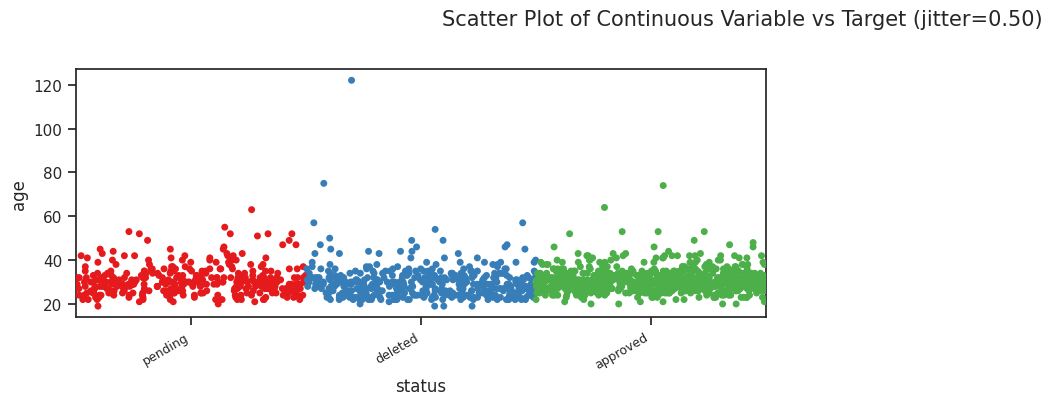

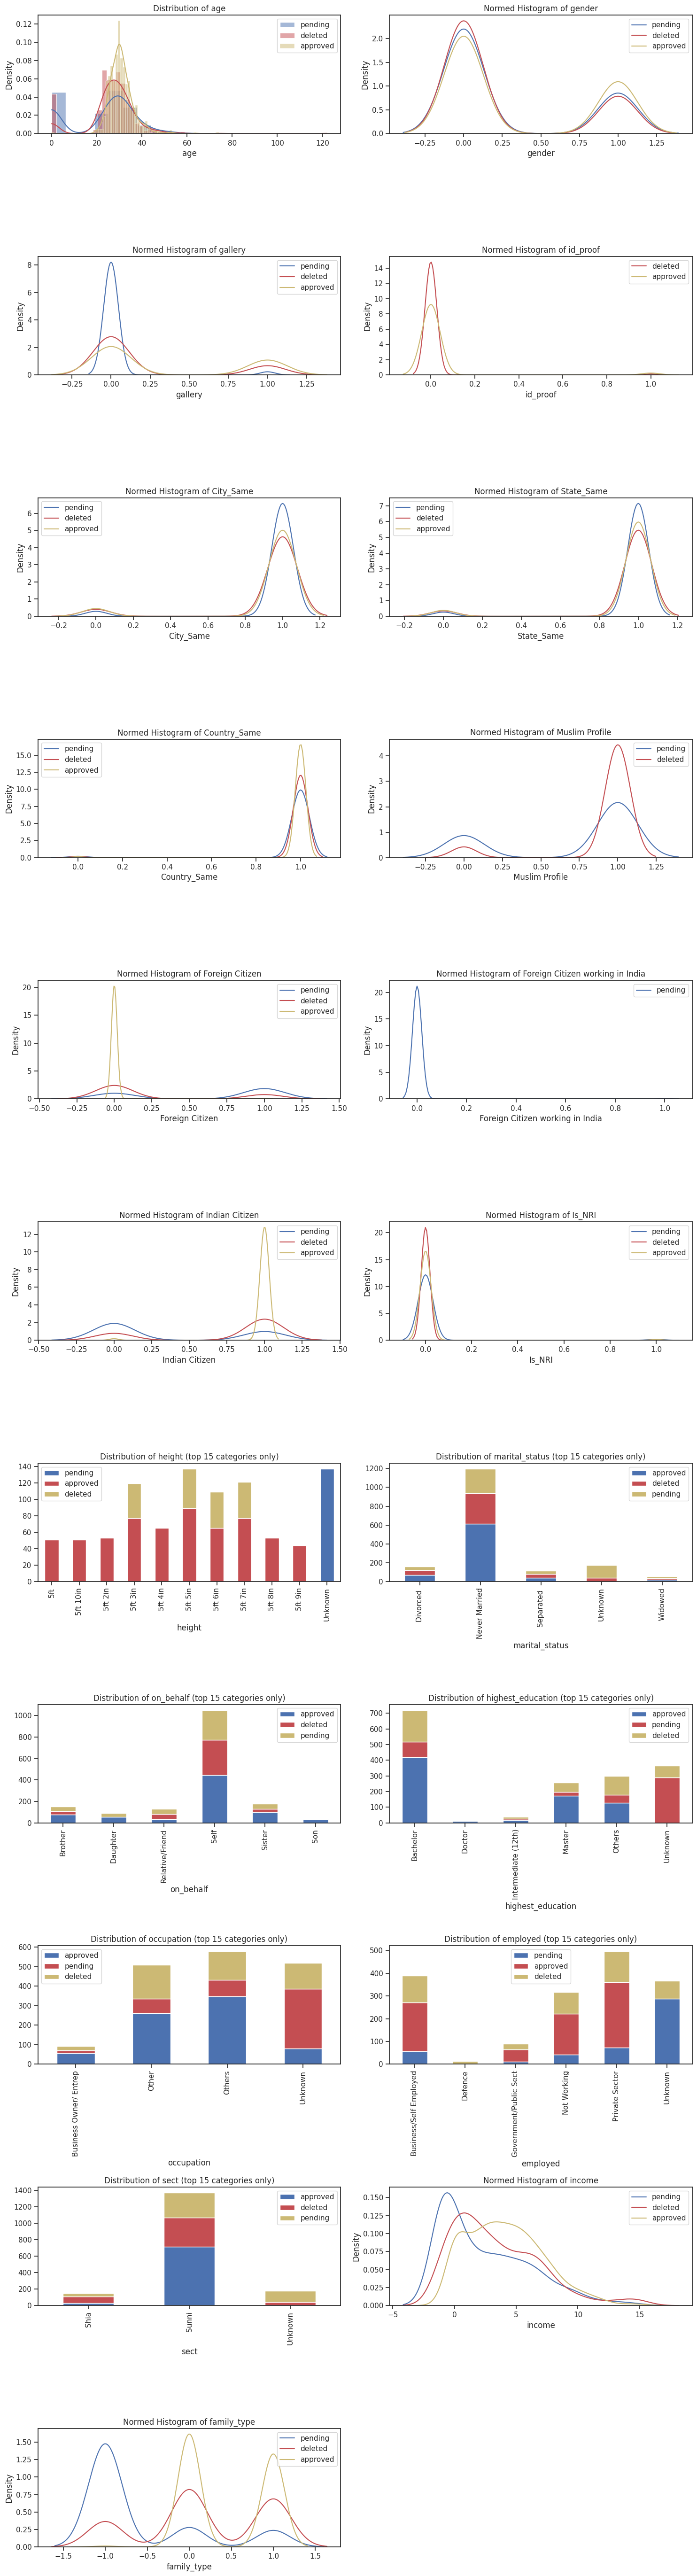

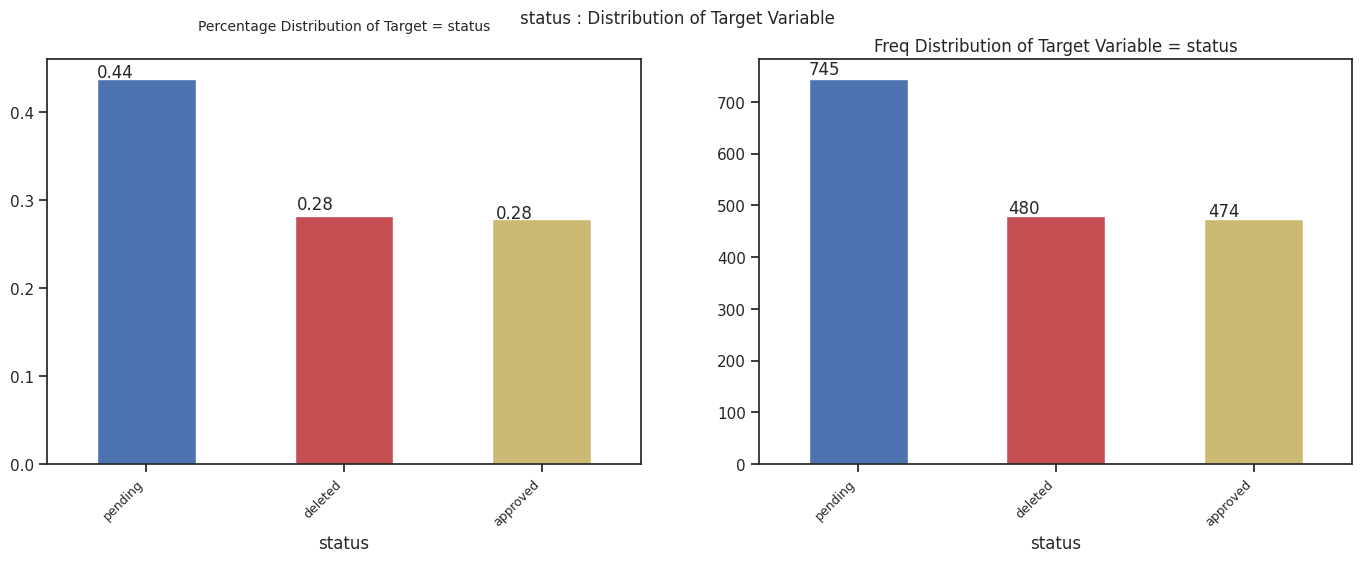

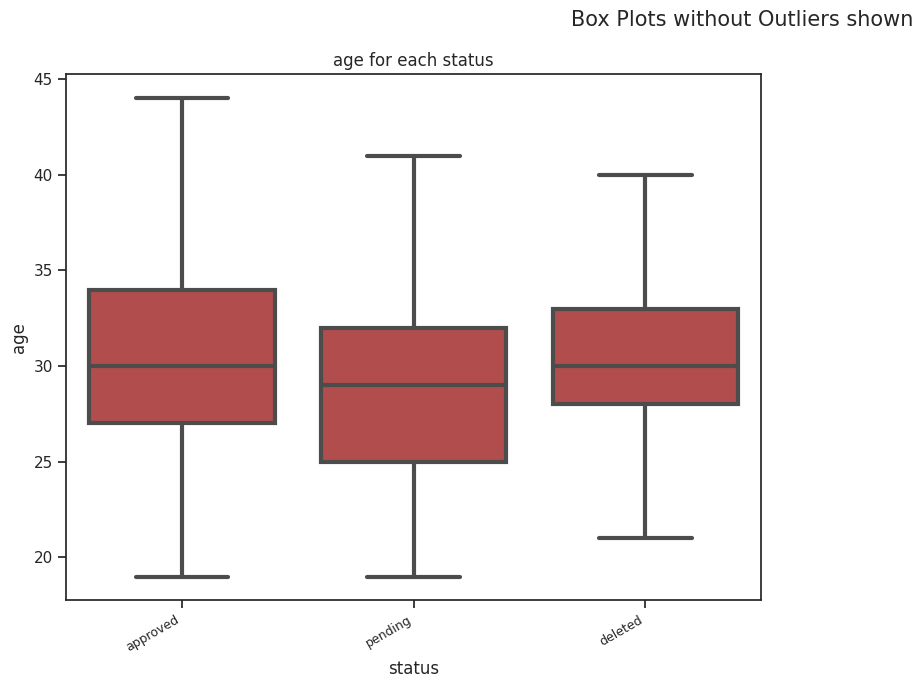

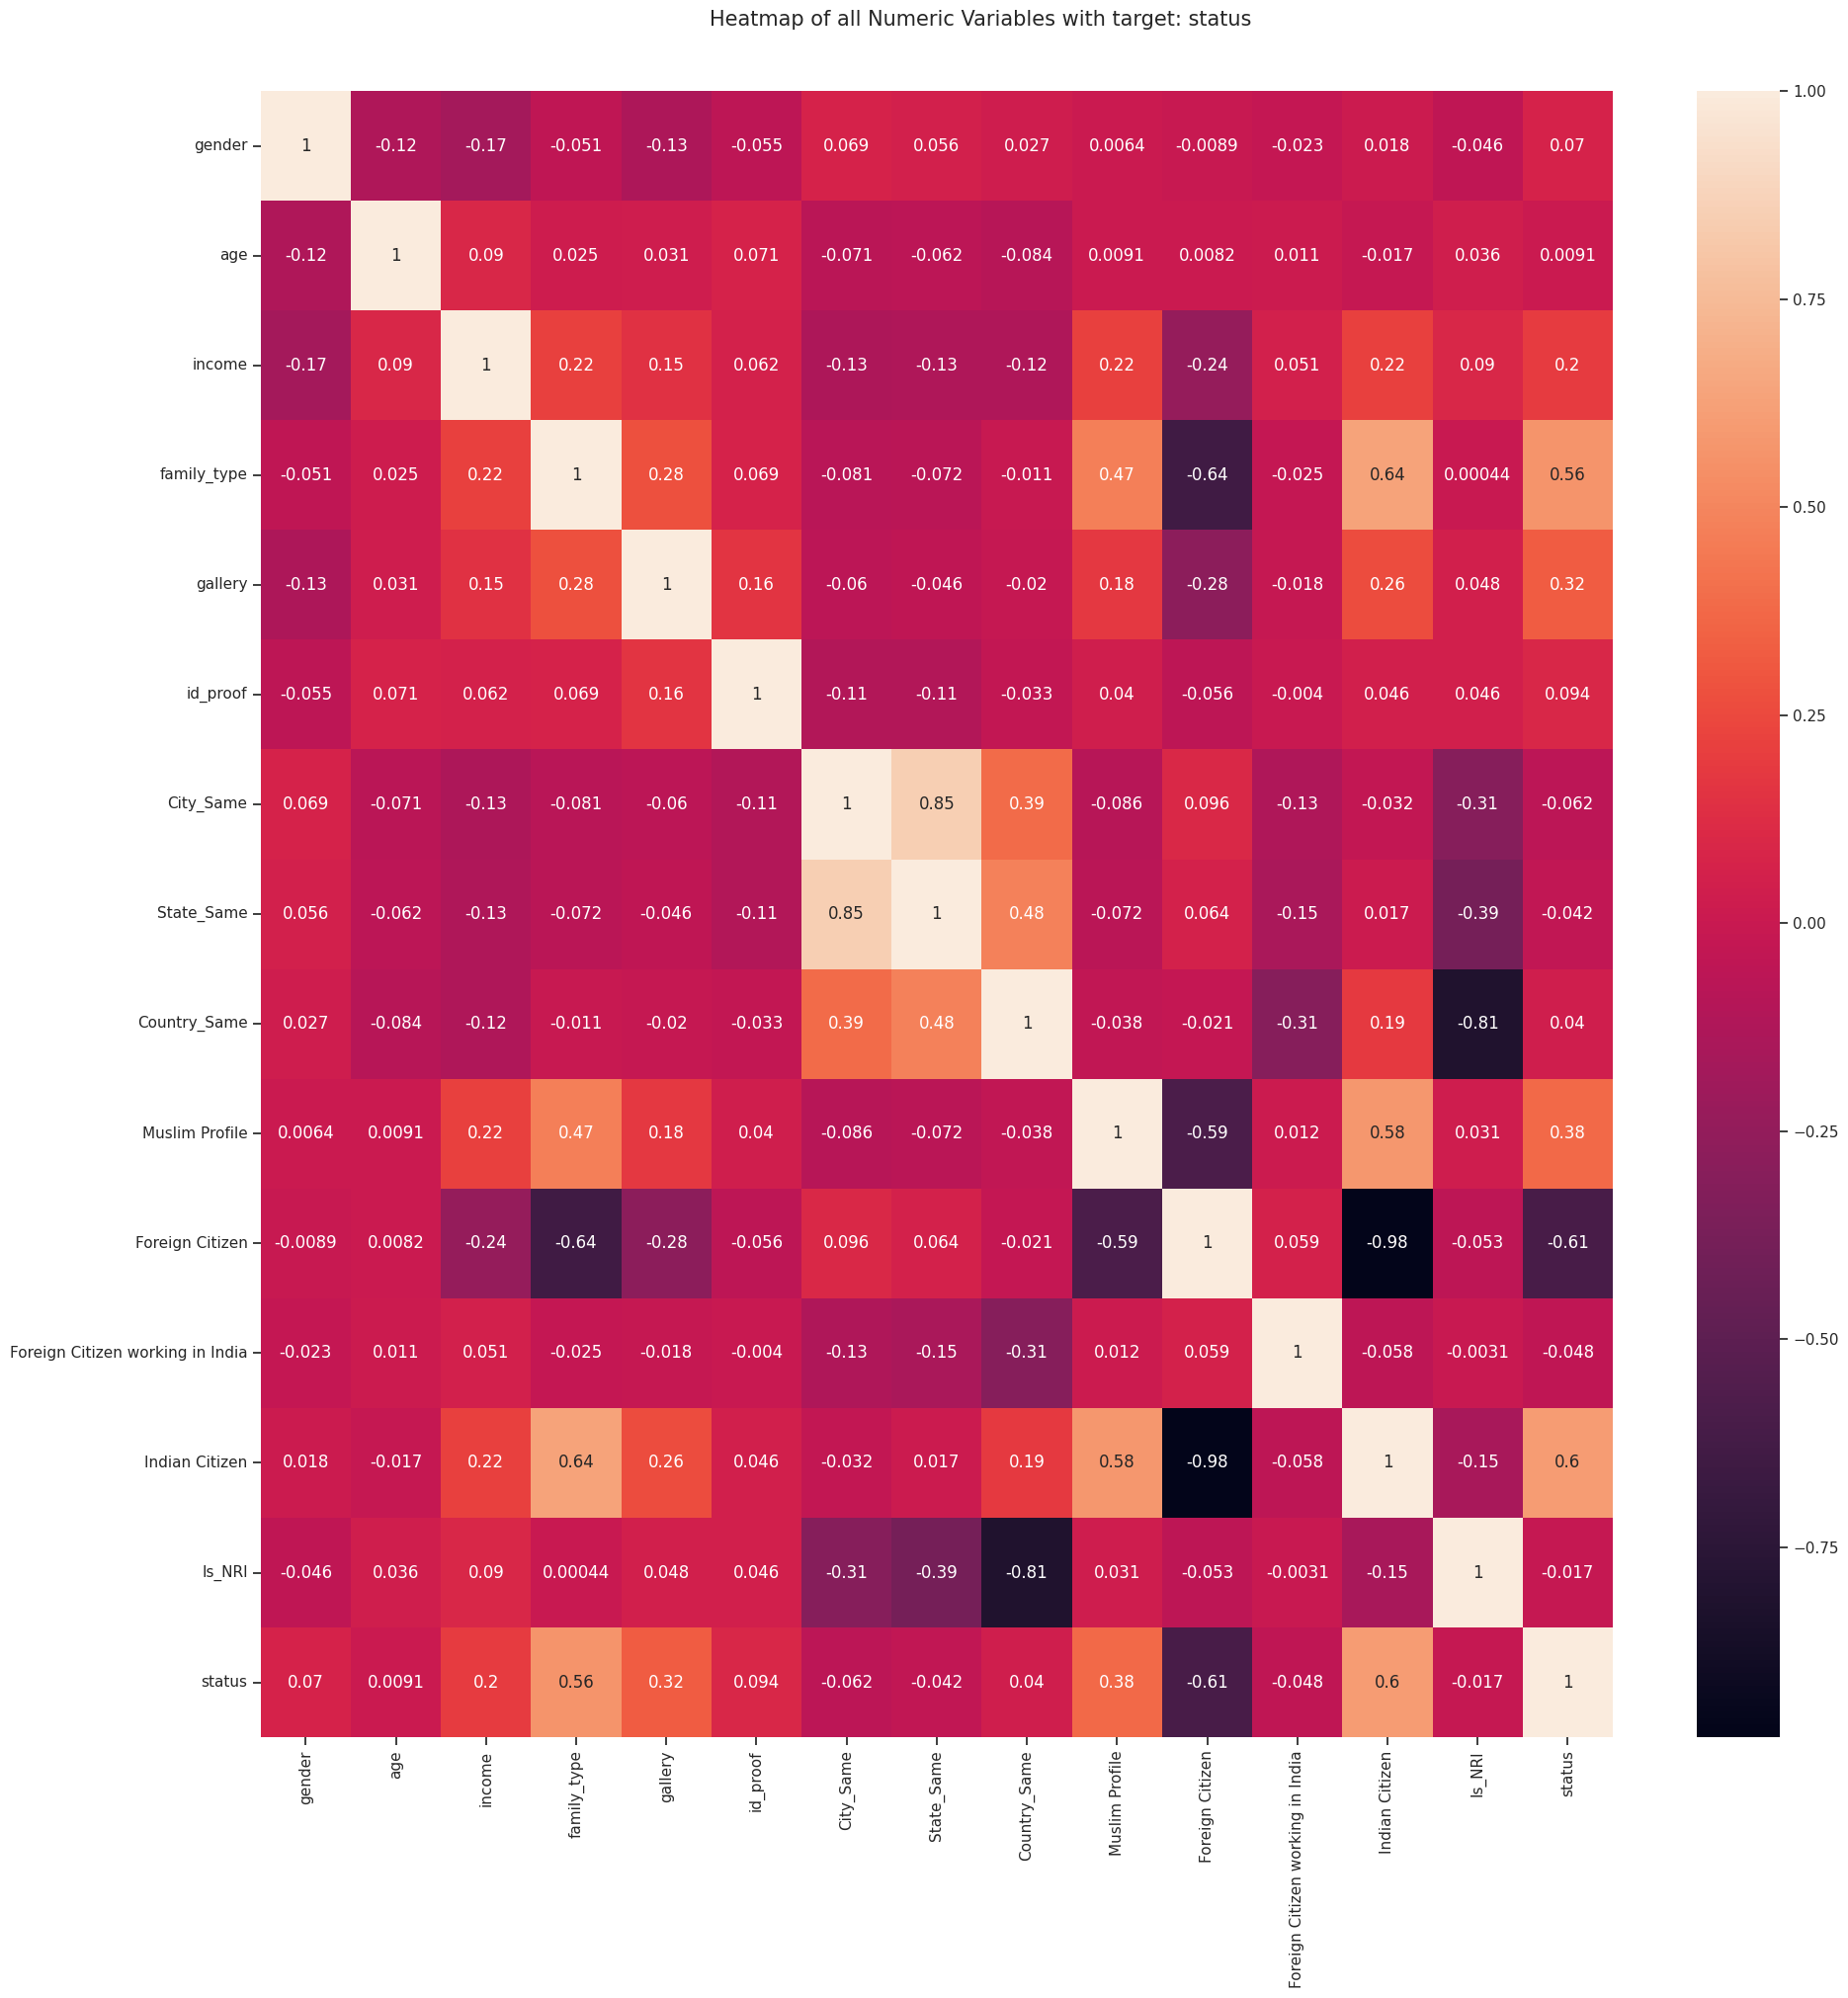

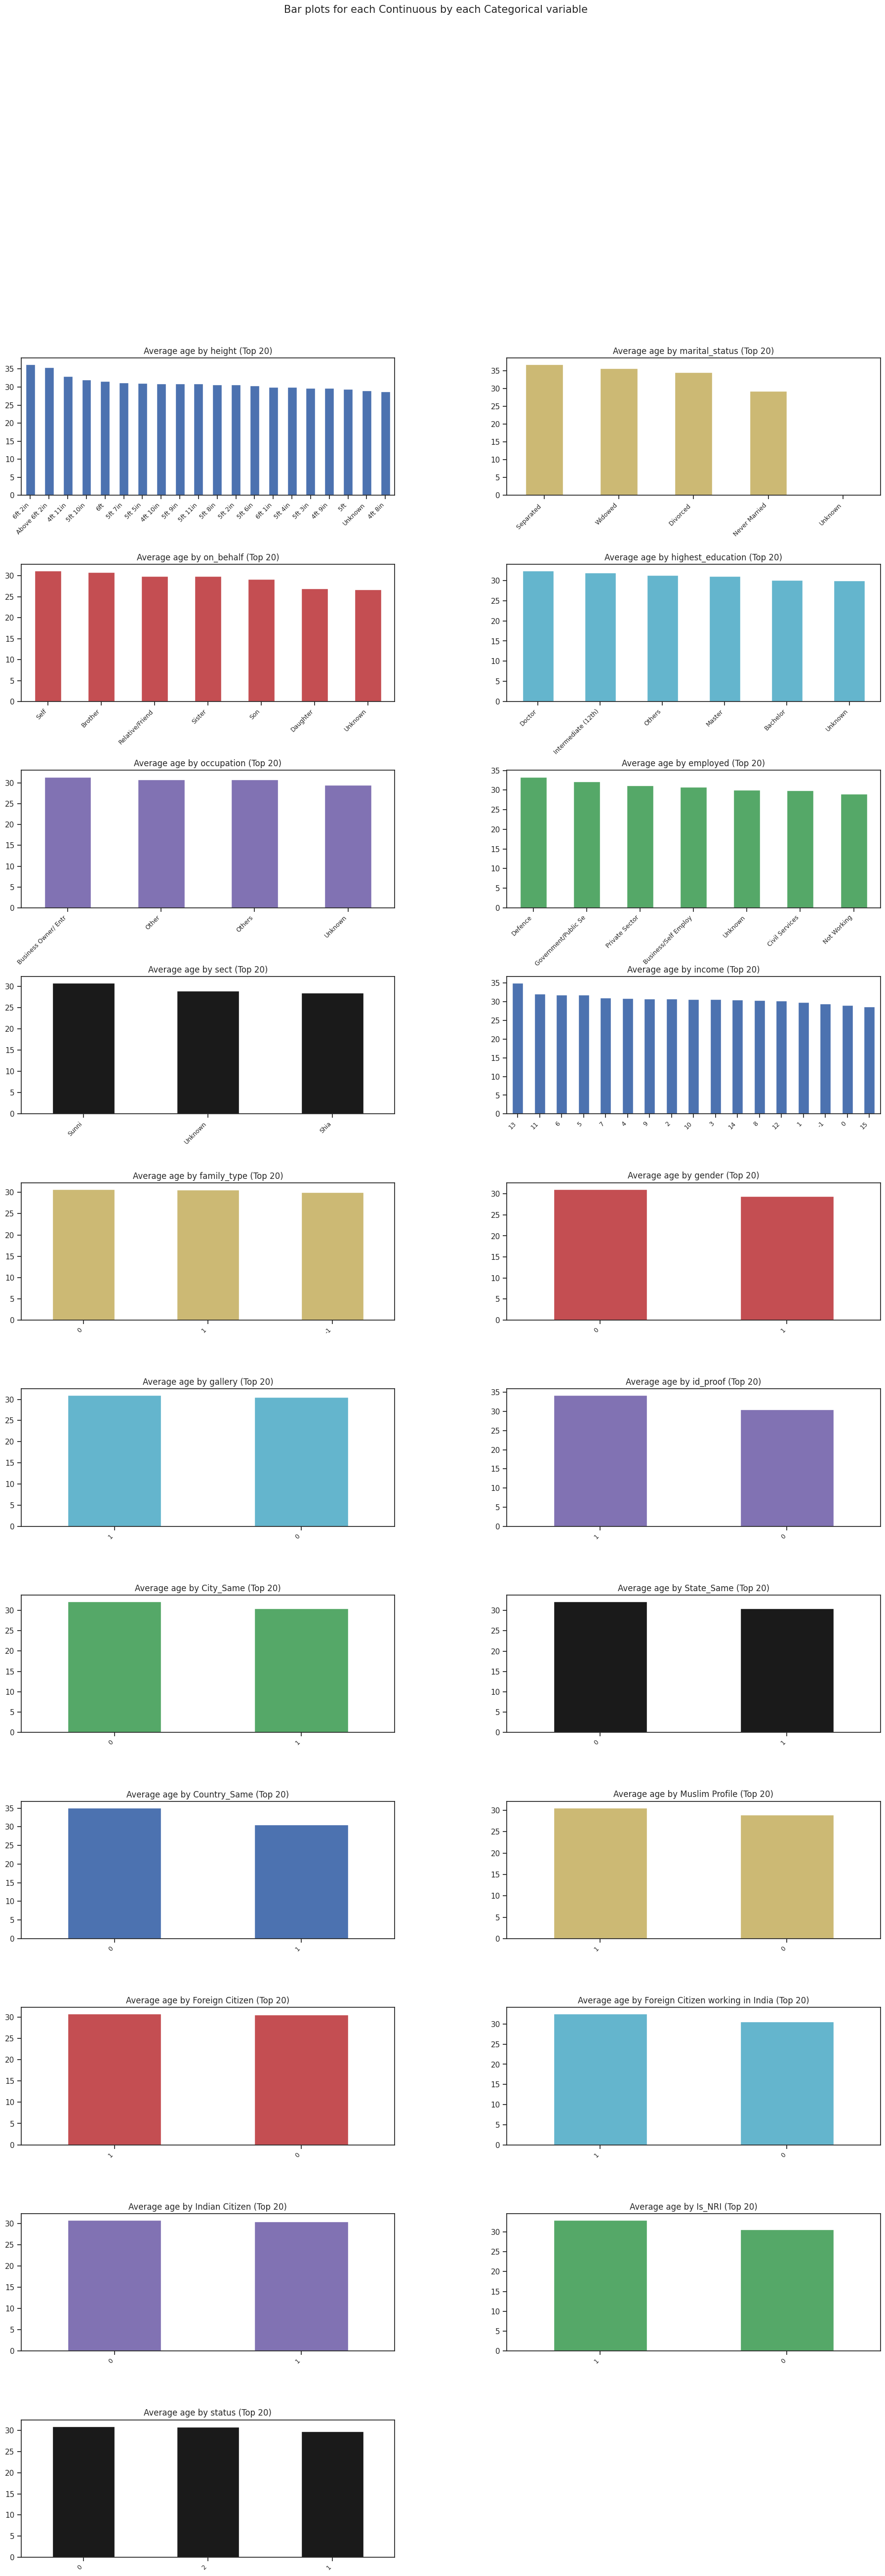

All Plots done
Time to run AutoViz = 19 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,gender,age,height,income,marital_status,on_behalf,highest_education,occupation,employed,sect,family_type,gallery,id_proof,City_Same,State_Same,Country_Same,Muslim Profile,Foreign Citizen,Foreign Citizen working in India,Indian Citizen,Is_NRI,status
678,0,NaN,Unknown,-1,Unknown,Self,Unknown,Unknown,Unknown,Unknown,-1,0,0,1,1,1,0,1,0,0,0,0
6,1,NaN,Unknown,-1,Unknown,Daughter,Unknown,Unknown,Unknown,Unknown,-1,0,0,1,1,1,0,1,0,0,0,1
182,0,53.0,6ft 2in,5,Widowed,Self,Intermediate (12th),Others,Private Sector,Sunni,1,0,0,1,1,1,1,0,0,1,0,2
1229,0,25.0,5ft 10in,4,Never Married,Self,Others,Others,Private Sector,Sunni,1,0,0,1,1,1,1,1,0,0,0,2
654,1,21.0,5ft 7in,4,Never Married,Relative/Friend,Bachelor,Unknown,Not Working,Sunni,0,0,0,1,1,1,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0,NaN,Unknown,0,Unknown,Self,Unknown,Unknown,Unknown,Unknown,-1,0,0,1,1,1,0,1,0,0,0,0
1216,0,NaN,Unknown,6,Unknown,Self,Unknown,Unknown,Unknown,Unknown,-1,0,0,1,1,1,0,1,0,0,0,0
1653,0,27.0,6ft 2in,8,Never Married,Son,Others,Others,Private Sector,Sunni,0,0,0,1,1,1,1,0,0,1,0,2
559,1,21.0,5ft 3in,0,Never Married,Daughter,Bachelor,Other,Not Working,Sunni,0,0,0,0,1,1,1,0,0,1,0,2


In [86]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
AV.AutoViz(filename="train.csv",dfte=df1,depVar="status",verbose=1,max_rows_analyzed=df1.shape[0], max_cols_analyzed=df1.shape[1])

In [87]:
# Median imputation for train dataset
df1['age'] = df1['age'].fillna(df1['age'].median())

# Median imputation for test dataset
df2['age'] = df2['age'].fillna(df2['age'].median())

# Check if there are still missing values in the age column
print("Missing values in train (age):", df1['age'].isnull().sum())
print("Missing values in test (age):", df2['age'].isnull().sum())


Missing values in train (age): 0
Missing values in test (age): 0


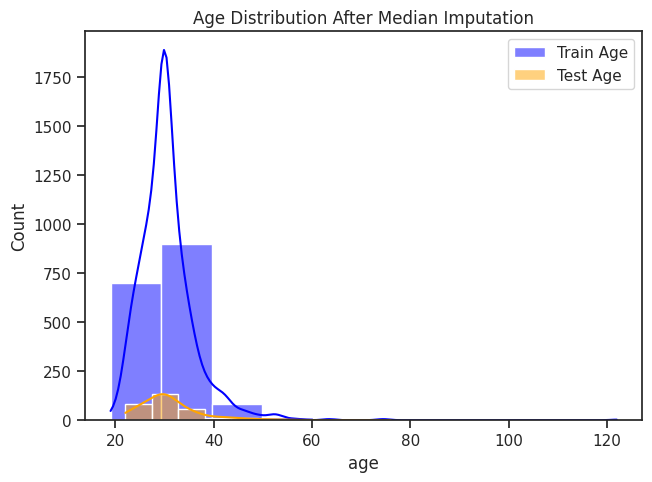

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df1['age'], bins=10, kde=True, color='blue', label='Train Age')
sns.histplot(df2['age'], bins=10, kde=True, color='orange', label='Test Age')
plt.legend()
plt.title("Age Distribution After Median Imputation")
plt.show()


In [89]:
df1.head()

,gender,age,height,income,marital_status,on_behalf,highest_education,occupation,employed,sect,family_type,gallery,id_proof,status,City_Same,State_Same,Country_Same,Muslim Profile,Foreign Citizen,Foreign Citizen working in India,Indian Citizen,Is_NRI
0,0,31.0,5ft 7in,7,Never Married,Self,Bachelor,Other,Government/Public Sect,Sunni,1,0,0,approved,1,1,1,1,0,0,1,0
1,0,33.0,5ft 5in,1,Never Married,Self,Others,Others,Business/Self Employed,Sunni,-1,0,0,pending,1,1,1,1,0,0,1,0
2,0,33.0,5ft 3in,2,Never Married,Self,Intermediate (12th),Others,Private Sector,Sunni,1,1,0,approved,1,1,1,1,0,0,1,0
3,0,32.0,5ft 5in,1,Separated,Self,Unknown,Unknown,Unknown,Sunni,-1,0,0,pending,1,1,1,1,1,0,0,0
4,0,31.0,5ft 7in,4,Never Married,Self,Bachelor,Others,Government/Public Sect,Sunni,0,1,0,approved,0,0,1,1,0,0,1,0


In [90]:
df1.to_csv("new_df1.csv")

In [91]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical columns
scaler = MinMaxScaler()
df1[['age', 'income']] = scaler.fit_transform(df1[['age', 'income']])
df2[['age', 'income']] = scaler.transform(df2[['age', 'income']])

In [92]:
# Standardizing the text columns
df1['height'] = df1['height'].str.strip().str.lower()
df2['height'] = df2['height'].str.strip().str.lower()

df1['marital_status'] = df1['marital_status'].str.strip().str.lower()
df2['marital_status'] = df2['marital_status'].str.strip().str.lower()

df1['highest_education'] = df1['highest_education'].str.strip().str.lower()
df2['highest_education'] = df2['highest_education'].str.strip().str.lower()

df1['occupation'] = df1['occupation'].str.strip().str.lower()
df2['occupation'] = df2['occupation'].str.strip().str.lower()

df1['sect'] = df1['sect'].str.strip().str.lower()
df2['sect'] = df2['sect'].str.strip().str.lower()


In [93]:
# Function to convert height to inches
def convert_height_to_inches(height_str):
    try:
        feet, inches = height_str.split('ft')
        feet = int(feet.strip())
        inches = int(inches.replace('in', '').strip())
        total_inches = feet * 12 + inches
        return total_inches
    except:
        return 0  # return 0 for invalid or missing heights

# Apply conversion
df1['height'] = df1['height'].apply(convert_height_to_inches)
df2['height'] = df2['height'].apply(convert_height_to_inches)


In [94]:
import numpy as np

def calculate_similarity(candidate, profile, weights):
    score = 0

    # Age similarity
    score += weights['age'] * (1 - abs(candidate['age'] - profile['age']))

    # Height similarity (if applicable)
    if candidate['height'] == profile['height']:
        score += weights['height']

    # Marital status match
    if candidate['marital_status'] == profile['marital_status']:
        score += weights['marital_status']

    # Education similarity
    if candidate['highest_education'] == profile['highest_education']:
        score += weights['highest_education']

    # Occupation match
    if candidate['occupation'] == profile['occupation']:
        score += weights['occupation']

    # Religion/Sect match
    if candidate['sect'] == profile['sect']:
        score += weights['sect']

    # Income similarity
    score += weights['income'] * (1 - abs(candidate['income'] - profile['income']))

     # Family type match
    if candidate['family_type'] == profile['family_type']:
        score += weights['family_type']

    return score

In [100]:
weights = {
    'age': 0.2,
    'height': 0.15,
    'income': 0.1,
    'marital_status': 0.1,
    'highest_education': 0.1,
    'occupation': 0.15,
    'sect': 0.1,
    'family_type': 0.1,
}

# Calculate the total sum of the weights
total_weight = sum(weights.values())

# Normalize the weights to make the sum equal to 1
normalized_weights = {key: value / total_weight for key, value in weights.items()}

# Print the normalized weights
print("Normalized Weights:", normalized_weights)

# Check the sum of normalized weights
print("Sum of Normalized Weights:", sum(normalized_weights.values()))


Normalized Weights: {'age': 0.20000000000000004, 'height': 0.15000000000000002, 'income': 0.10000000000000002, 'marital_status': 0.10000000000000002, 'highest_education': 0.10000000000000002, 'occupation': 0.15000000000000002, 'sect': 0.10000000000000002, 'family_type': 0.10000000000000002}
Sum of Normalized Weights: 1.0000000000000002


In [101]:
# Reload the original data to restore 'member_id'
df1_original = pd.read_csv('train.csv')
df2_original = pd.read_csv('test.csv')

# Add 'member_id' back to the preprocessed data
df1['member_id'] = df1_original['member_id']
df2['member_id'] = df2_original['member_id']

# Initialize an empty list to store match results
matches = []

# Inside the for loop where you're iterating over candidates and profiles
for _, candidate in df2.iterrows():
    best_match = None
    highest_score = -1

    for _, profile in df1.iterrows():
        # Calculate the similarity score
        score = calculate_similarity(candidate, profile, weights)

        # Print the score for debugging purposes
        print(f"Comparing Candidate {candidate['member_id']} with Profile {profile['member_id']}: Score = {score}")

        if score > highest_score:
            highest_score = score
            best_match = profile

    # Store the match result
    if best_match is not None:
        matches.append({
            'Candidate_ID': candidate['member_id'],
            'Matched_Profile_ID': best_match['member_id'],
            'Score': highest_score
        })


# Convert matches to a DataFrame
matches_df = pd.DataFrame(matches)

# Display the top matches
print(matches_df.head())

Streaming output truncated to the last 5000 lines.
Comparing Candidate 29664 with Profile 28252: Score = 0.4594660194174757
Comparing Candidate 29664 with Profile 28918: Score = 0.5006067961165048
Comparing Candidate 29664 with Profile 29831: Score = 0.4212985436893204
Comparing Candidate 29664 with Profile 28197: Score = 0.34375000000000006
Comparing Candidate 29664 with Profile 28855: Score = 0.3637742718446602
Comparing Candidate 29664 with Profile 29073: Score = 0.43919902912621356
Comparing Candidate 29664 with Profile 28420: Score = 0.44587378640776704
Comparing Candidate 29664 with Profile 28568: Score = 0.5814320388349514
Comparing Candidate 29664 with Profile 29594: Score = 0.4383495145631068
Comparing Candidate 29664 with Profile 28774: Score = 0.4540655339805826
Comparing Candidate 29664 with Profile 27902: Score = 0.3493325242718447
Comparing Candidate 29664 with Profile 29240: Score = 0.6083737864077671
Comparing Candidate 29664 with Profile 28091: Score = 0.31031553398058

In [102]:
threshold = 0.5  # Set a threshold for valid matches

# Iterate through each candidate in df2 (test dataset)
for _, candidate in df2.iterrows():
    best_match = None
    highest_score = -1

    # Compare the candidate against all profiles in df1 (train dataset)
    for _, profile in df1.iterrows():
        # Calculate the similarity score
        score = calculate_similarity(candidate, profile, weights)

        if score > highest_score:
            highest_score = score
            best_match = profile

    # Only store matches with a score above the threshold
    if best_match is not None and highest_score > threshold:
        matches.append({
            'Candidate_ID': candidate['member_id'],
            'Matched_Profile_ID': best_match['member_id'],
            'Score': highest_score
        })
    else:
        print(f"No valid match found for Candidate {candidate['member_id']} with score {highest_score}")


In [103]:
unmatched_candidates = []  # Initialize an empty list to store unmatched candidates

# Iterate through each candidate in df2 (test dataset)
for _, candidate in df2.iterrows():
    best_match = None
    highest_score = -1

    # Compare the candidate against all profiles in df1 (train dataset)
    for _, profile in df1.iterrows():
        # Calculate the similarity score
        score = calculate_similarity(candidate, profile, weights)

        if score > highest_score:
            highest_score = score
            best_match = profile

    # Store the match result
    if best_match is not None and highest_score > threshold:
        matches.append({
            'Candidate_ID': candidate['member_id'],
            'Matched_Profile_ID': best_match['member_id'],
            'Score': highest_score
        })
    else:
        print(f"No match found for Candidate {candidate['member_id']} with score {highest_score}")
        # Add the unmatched candidate to the list
        unmatched_candidates.append(candidate['member_id'])

# Optionally, print out unmatched candidates
if unmatched_candidates:
    print(f"Unmatched Candidates: {unmatched_candidates}")


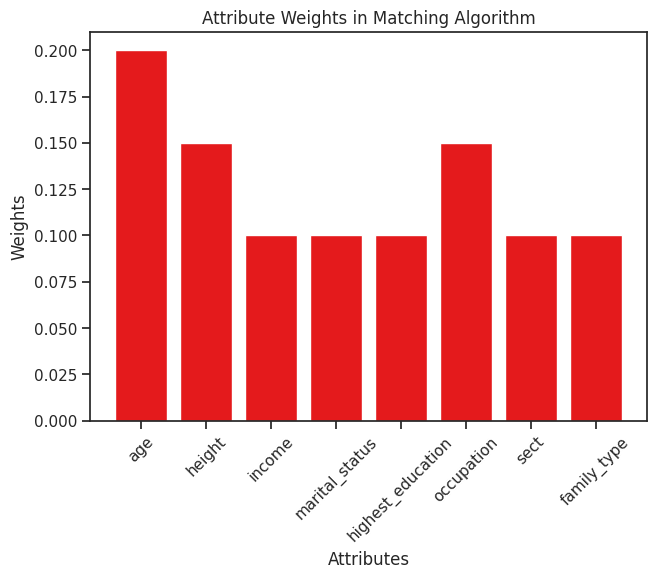

In [104]:
import matplotlib.pyplot as plt

weights = {
    'age': 0.2,
    'height': 0.15,
    'income': 0.1,
    'marital_status': 0.1,
    'highest_education': 0.1,
    'occupation': 0.15,
    'sect': 0.1,
    'family_type': 0.1,
}

attributes = list(weights.keys())
values = list(weights.values())

plt.bar(attributes, values)
plt.title('Attribute Weights in Matching Algorithm')
plt.xlabel('Attributes')
plt.ylabel('Weights')
plt.xticks(rotation=45)
plt.show()


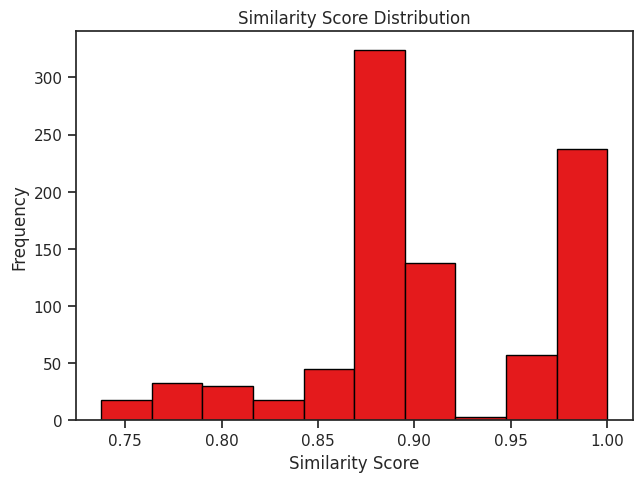

In [105]:
# Assuming you have a list of all similarity scores
scores = [match['Score'] for match in matches]

plt.hist(scores, bins=10, edgecolor='black')
plt.title('Similarity Score Distribution')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()


In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gender                            1699 non-null   int64  
 1   age                               1699 non-null   float64
 2   height                            1699 non-null   int64  
 3   income                            1699 non-null   float64
 4   marital_status                    1699 non-null   object 
 5   on_behalf                         1699 non-null   object 
 6   highest_education                 1699 non-null   object 
 7   occupation                        1699 non-null   object 
 8   employed                          1699 non-null   object 
 9   sect                              1699 non-null   object 
 10  family_type                       1699 non-null   int64  
 11  gallery                           1699 non-null   int64  
 12  id_pro

In [107]:
import pandas as pd
import numpy as np

# Assuming 'matches_df' contains 'Candidate_ID', 'Matched_Profile_ID', and 'Score' columns
# Add the original attributes from both datasets (df1 and df2) to the matches_df
matches_with_attributes = matches_df.copy()

# Add attributes from df2 (candidates) and df1 (profiles) into the matches dataframe
# For simplicity, assume df1 and df2 contain the necessary attributes like 'age', 'height', etc.
matches_with_attributes = matches_with_attributes.merge(df2[['member_id', 'age', 'height', 'income', 'marital_status', 'occupation']], left_on='Candidate_ID', right_on='member_id', how='left')
matches_with_attributes = matches_with_attributes.merge(df1[['member_id', 'age', 'height', 'income', 'marital_status', 'occupation']], left_on='Matched_Profile_ID', right_on='member_id', how='left', suffixes=('_candidate', '_profile'))

# Now calculate the difference for numeric attributes and binary match for string attributes
attributes = ['age', 'height', 'income', 'marital_status', 'occupation']

# Calculate absolute differences for numeric attributes and binary match for string attributes
for attribute in attributes:
    if attribute in ['age', 'height', 'income']:  # Numeric attributes
        matches_with_attributes[f'{attribute}_diff'] = np.abs(matches_with_attributes[f'{attribute}_candidate'] - matches_with_attributes[f'{attribute}_profile'])
    else:  # String attributes (occupation, marital_status)
        matches_with_attributes[f'{attribute}_match'] = (matches_with_attributes[f'{attribute}_candidate'] == matches_with_attributes[f'{attribute}_profile']).astype(int)

# Now, calculate the correlation matrix
correlation_matrix = matches_with_attributes[['Score', *[f'{attribute}_diff' for attribute in attributes if attribute in ['age', 'height', 'income']] + [f'{attribute}_match' for attribute in attributes if attribute in ['marital_status', 'occupation']]]].corr()

# Print the correlation of each attribute with the match score
print(correlation_matrix['Score'].sort_values(ascending=False))


Score                   1.000000
marital_status_match    0.290891
occupation_match        0.074955
height_diff            -0.147057
age_diff               -0.257736
income_diff            -0.278509
Name: Score, dtype: float64


In [108]:
matches_with_attributes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Candidate_ID              301 non-null    int64  
 1   Matched_Profile_ID        301 non-null    int64  
 2   Score                     301 non-null    float64
 3   member_id_candidate       301 non-null    int64  
 4   age_candidate             301 non-null    float64
 5   height_candidate          301 non-null    int64  
 6   income_candidate          301 non-null    float64
 7   marital_status_candidate  301 non-null    object 
 8   occupation_candidate      301 non-null    object 
 9   member_id_profile         301 non-null    int64  
 10  age_profile               301 non-null    float64
 11  height_profile            301 non-null    int64  
 12  income_profile            301 non-null    float64
 13  marital_status_profile    301 non-null    object 
 14  occupation

In [109]:
matches_with_attributes.to_csv("matches_with_attributes.csv")